# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [22]:
df1 = df[df.dt >= "01.01.1950"]
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

C:\Users\Egor\AppData\Local\Temp\ipykernel_16248\3041209851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["year"] = df1["dt"].dt.year


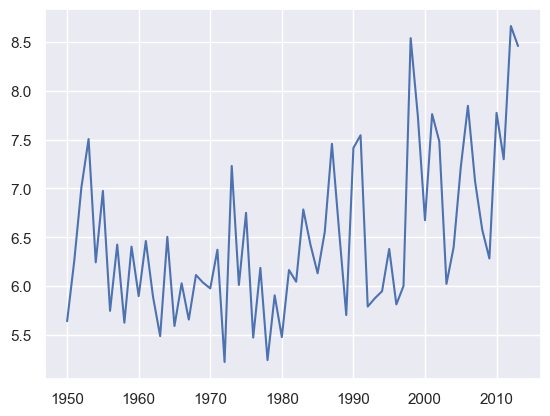

In [4]:
import seaborn as sns
sns.set_theme()


df1["year"] = df1["dt"].dt.year
group = df1[df1.City == "Toronto"].groupby('year').AverageTemperature.mean().reset_index()
group.head()
plt.plot(group.year, group.AverageTemperature)
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [5]:
group1 = df1.groupby('City').AverageTemperature.var().reset_index()
print(*group1[group1.AverageTemperature == max(group1.AverageTemperature)]["City"])

Harbin


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

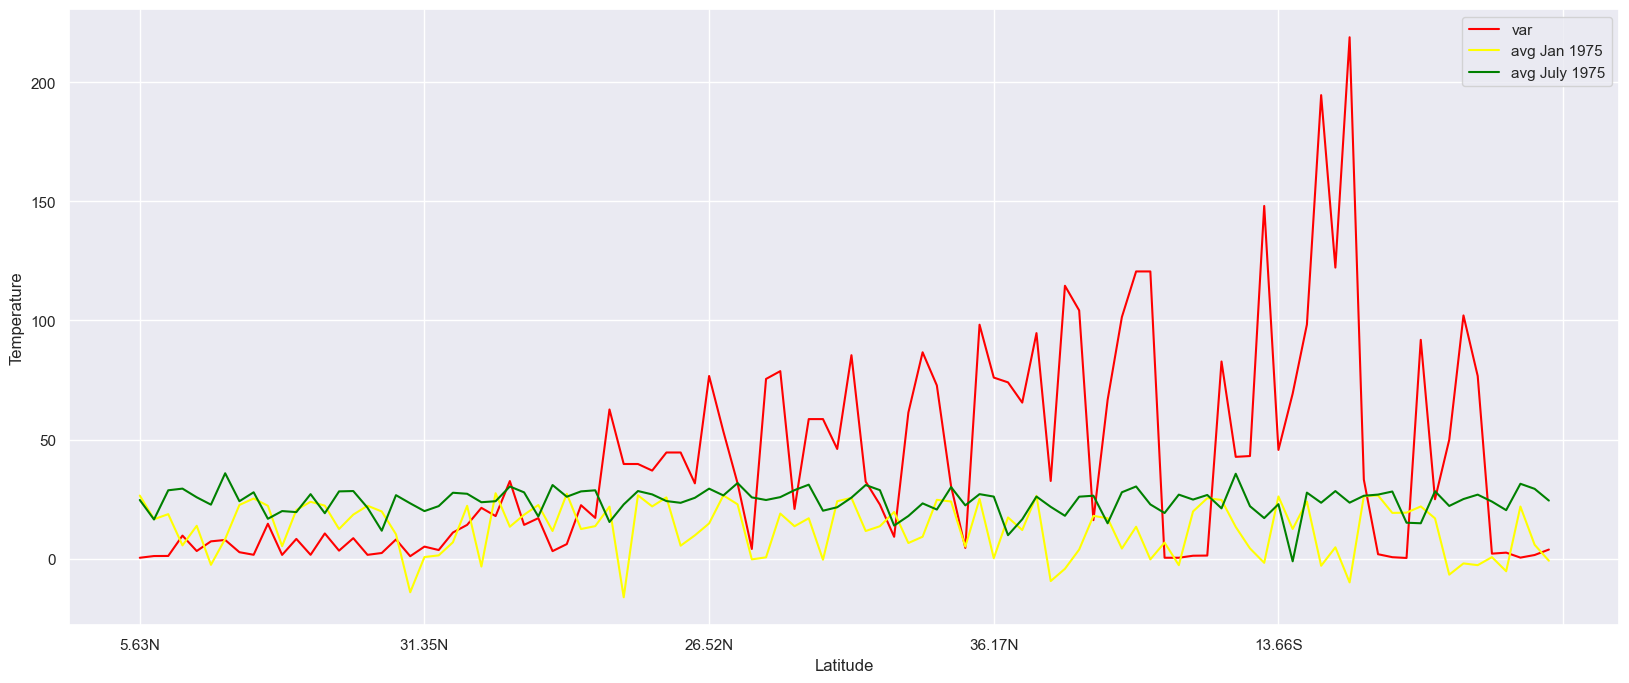

In [6]:
group2 = df1.groupby(['City', 'Latitude']).AverageTemperature.var().reset_index().sort_values('Latitude')
group3 = df1[(df1.dt.dt.year == 1975) & (df1.dt.dt.month == 1)].groupby(['City', 'Latitude']).AverageTemperature.mean().reset_index()
group4 = df1[(df1.dt.dt.year == 1975) & (df1.dt.dt.month == 7)].groupby(['City', 'Latitude']).AverageTemperature.mean().reset_index()

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 16
ax = group2.plot(x='Latitude', y='AverageTemperature', label="var", color="red")
group3.plot(ax=ax, x='Latitude', y='AverageTemperature', label="avg Jan 1975", color="yellow")
group4.plot(ax=ax, x='Latitude', y='AverageTemperature', label="avg July 1975", color="green")

ax.set(xlabel="Latitude", ylabel="Temperature")
plt.show()


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

1953, 1957, 1959, 1961, 1964, 1967, 1972, 1975, 1977, 1979, 1983, 1986, 1989, 1992, 1995, 1997, 2000, 2002, 2005, 2008, 2011


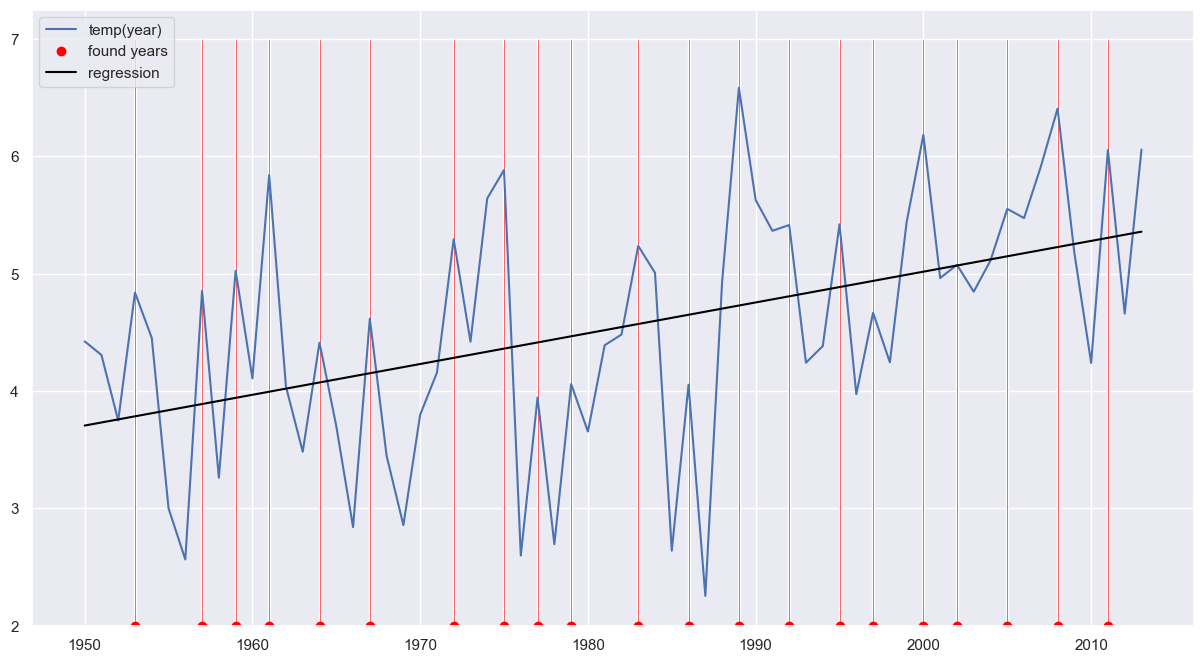

In [7]:
spb = df1[df1.City == 'Saint Petersburg']
gr = spb.groupby('year').AverageTemperature.mean().reset_index()
gr["delta_down"] = gr["AverageTemperature"] - gr["AverageTemperature"].shift(1)
gr["delta_up"] = gr["AverageTemperature"] - gr["AverageTemperature"].shift(-1)
years = gr[(gr.delta_down > 0) & (gr.delta_up > 0)].year
print(*years, sep=", ")

plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(gr.year, gr.AverageTemperature, label="temp(year)")
plt.bar(years, 5, width=0.12, bottom=2, color="red") 
plt.plot(years, [2]*len(years), 'o', color="red", label="found years")


from sklearn.linear_model import LinearRegression
import numpy as np
lm = LinearRegression()
X = np.array(gr.year).reshape(-1, 1)
y = np.array(gr.AverageTemperature)
lm.fit(X,y)

plt.plot(gr.year, lm.predict(X), color="black", label="regression")
plt.legend()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее значение дней с отрицательной температурой в году.

In [8]:
city = df1.groupby(['City', 'year']).AverageTemperature.mean().reset_index()
max_t = city.groupby('City').AverageTemperature.max().reset_index()
min_t = city.groupby('City').AverageTemperature.min().reset_index()
max_t['diff'] = max_t.AverageTemperature - min_t.AverageTemperature
print(*max_t[max_t.AverageTemperature == max(max_t.AverageTemperature)].City)

Umm Durman


In [9]:
jan = df1[df1.dt.dt.month == 1]
jul = df1[df1.dt.dt.month == 7]
jan["diff"] = abs(np.array(jan.AverageTemperature) - np.array(jul.AverageTemperature))
city = jan.groupby('City')["diff"].mean().reset_index()
print(*city[city["diff"] == city["diff"].max()].City)

Harbin


C:\Users\Egor\AppData\Local\Temp\ipykernel_16248\3324012768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan["diff"] = abs(np.array(jan.AverageTemperature) - np.array(jul.AverageTemperature))


In [10]:
neg = df1[df1.AverageTemperature < 0].groupby(['City']).dt.count().reset_index()
neg

,City,dt
0,Ankara,68
1,Berlin,62
2,Changchun,310
3,Chengdu,22
4,Chicago,83
5,Dalian,176
6,Harbin,314
7,Jinan,88
8,Kabul,6
9,Kiev,215


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента. 

Text(0.5, 1.0, 'Cities')

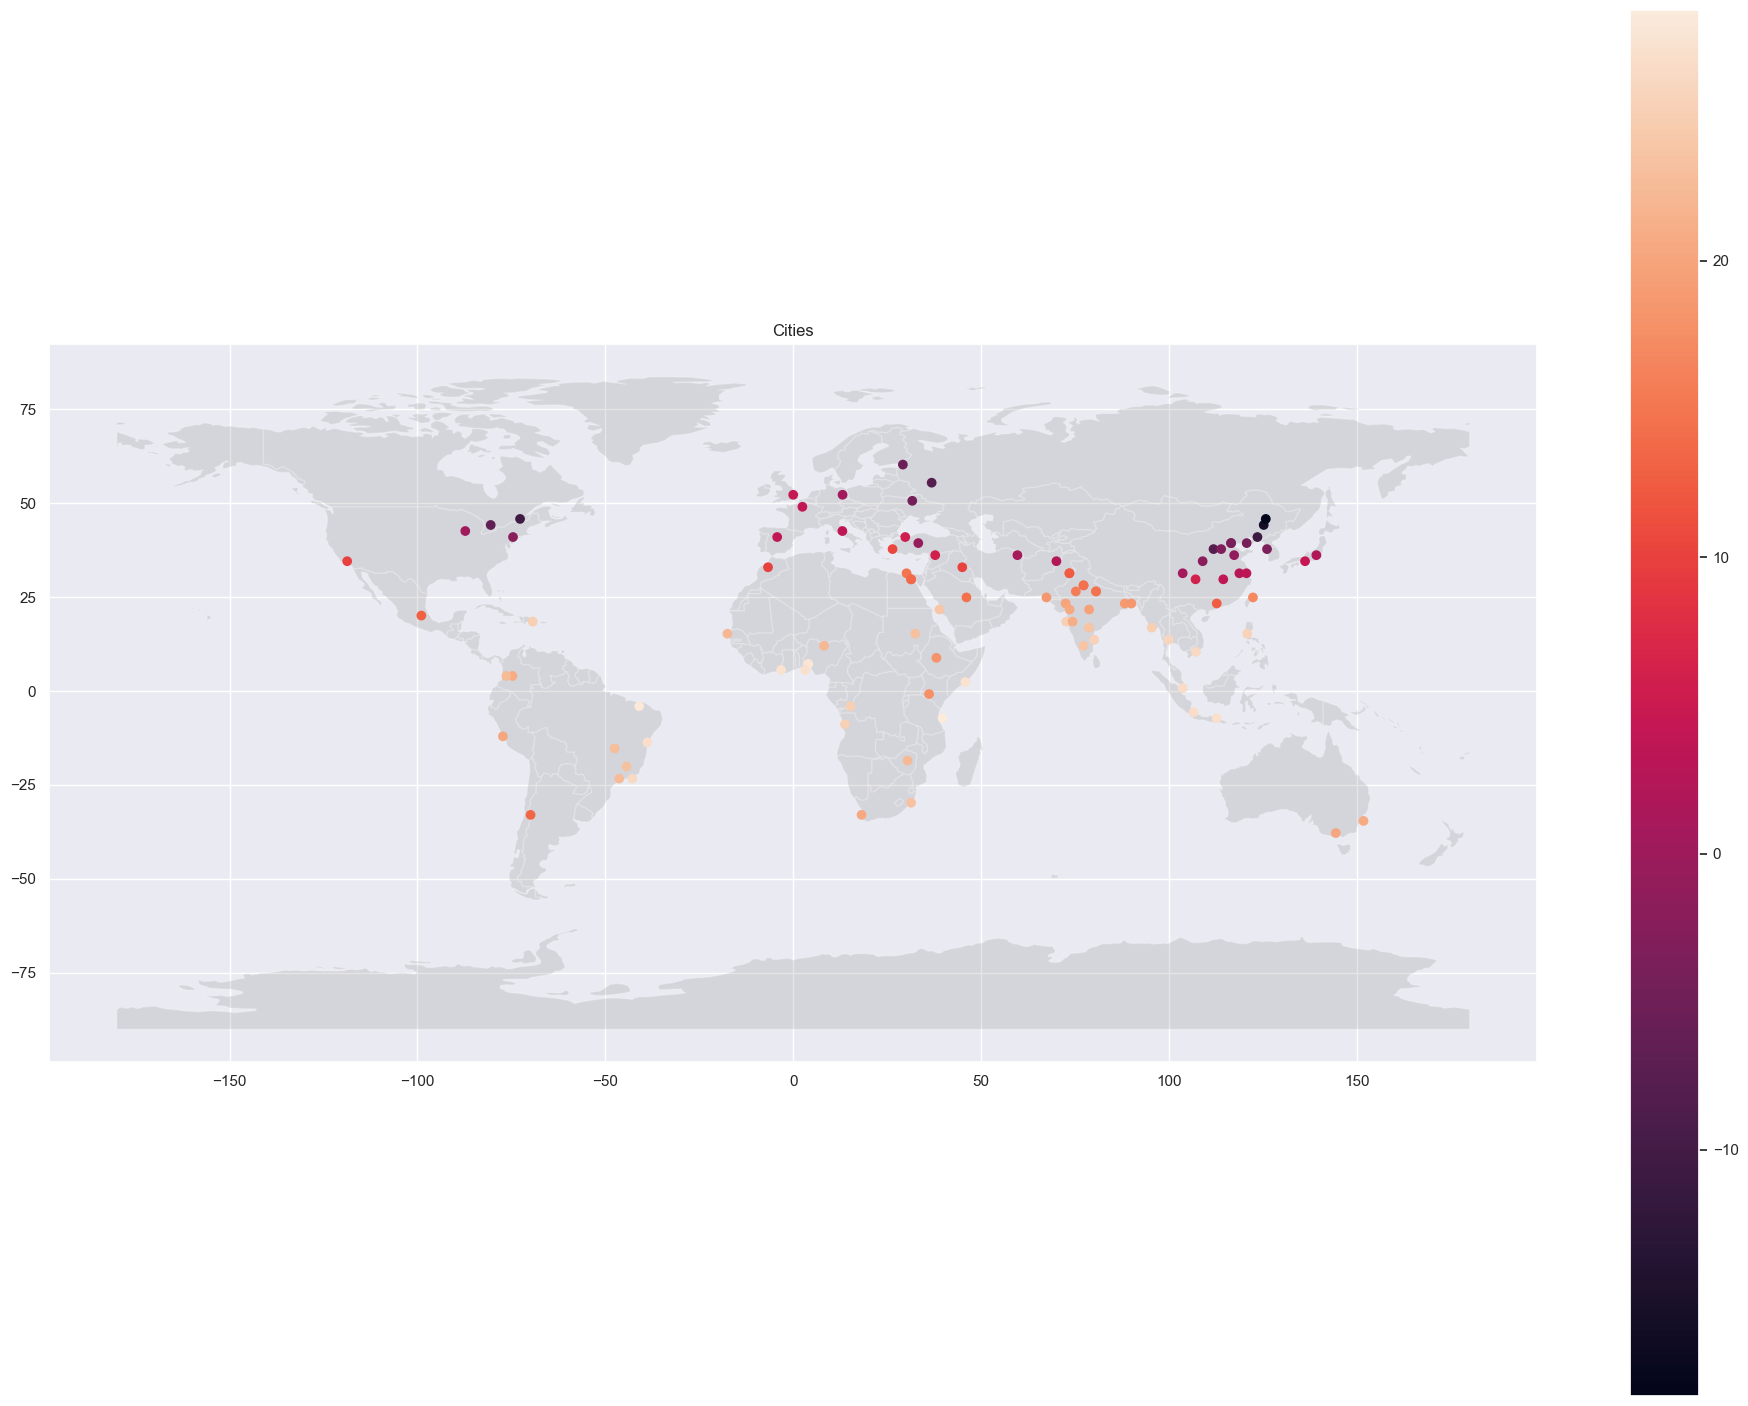

In [41]:
import geopandas as gpd
import matplotlib.colors as mcolors

def conversion(old):
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    new_dir = direction[old[-1:]]
    new = old[:-1]
    return float(new)*new_dir


geo_df = df1.copy()
geo_df["Latitude"] = geo_df["Latitude"].apply(conversion)
geo_df["Longitude"] = geo_df["Longitude"].apply(conversion)

last_10_years_in_jan = geo_df[(df1.dt >= "2003-09-01") & (geo_df.dt.dt.month == 1)].groupby(['City', 'Latitude', 'Longitude']).AverageTemperature.mean().reset_index()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

geo_df = gpd.GeoDataFrame(
    last_10_years_in_jan,
    geometry=gpd.points_from_xy(
        last_10_years_in_jan.Longitude,
        last_10_years_in_jan.Latitude
    )
)

fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.2, color="grey")
geo_df.plot(column="AverageTemperature", ax=ax, legend=True)
plt.title("Cities")

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*